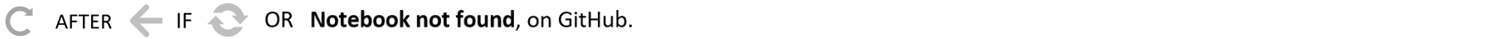

#### [Return to README ](https://github.com/teresahanak/wikipedia-life-expectancy#explore-the-project)

# Wikipedia Notable Life Expectancies
## Notebook  14: Model User Interface
### Contents

This notebook covers:
- An example Gradio user interface for testing the productionized model.<sup>1</sup>

### Instructions
Options for Running this Notebook:  
***Note: The Gradio User Interface is only visible when the notebook is running.  It will not display in HTML rendition.  See [Image 8](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/README.md#predict) in README for a sample.
1. Clone the repository:   
    - Navigate to the cloned repository in Jupyter and open the notebook to run it.
    - Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions).
2. Save the notebook and files below to the same working directory:<sup>2</sup>
    - Download the notebook:
        - Click on <kbd>Raw</kbd> above.
        - Save <kbd>Ctrl</kbd> + <kbd>S</kbd>
    - Follow the link to the pkl file and click <kbd>Download</kbd>, then move file to the same directory as the notebook:
        - [production_model.pkl](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/production_model.pkl)<sup>3</sup>
        - [region_place_dict.pkl](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/region_place_dict.pkl)<sup>4</sup>
    - In Jupyter, navigate to the directory in which the notebook and file are saved, to open and run the notebook.  
    - Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions).

    

### Production Model Features Dictionary
- **num_references**:  Number of references for individual's page
- **years**: Translation of year pf death ($year - 1994$)
- **sciences**: (0 for no or 1 for yes) individual known for sciences (math, physics, chemistry, engineering, mechanics, etc.)
- **social**: (0 for no or 1 for yes) individual known for social action (philanthropy, fund-raising for social cause, founder of charity, etc.)
- **spiritual**: (0 for no or 1 for yes) individual known for spiritual association (religious association, traditional healing, self-help/motivational instructor, etc.)
- **academia_humanities**: (0 for no or 1 for yes) individual known for education activity (educator, education administration, lecturer, etc.; excludes sports-related instruction/coaching, but includes art/performing arts instruction; includes museum-related activities; classics, archeology, linguistics, anthropology, etc.)
- **business_farming**: (0 for no or 1 for yes) individual known for business or farming (includes marketing, millionaire/billionaire, manufacturing, oil/energy)
- **arts**: (0 for no or 1 for yes) individual known for arts-related activity (fine and performing arts, journalism, writing, arts administration, art patronage, collecting, etc.; gallery owners/founders are included; museum-related is excluded; stunt performers included)
- **sports**: (0 for no or 1 for yes) individual known for sports-related activity (traditional sports participation/instruction/coaching/ownership/fandom/commentator and anything competition-based, including non-physical games, such as chess; sportswriter, etc. would have dual category of arts)
- **law_enf_military_operator**: (0 for no or 1 for yes) individual known for law enforcement, military/paramilitary association/activity, or specialized equipment operation (pilot, ship captain (non-sport), radio operator, etc.); category aims to reflect individual's proximity to activity and/or weapons/equipment or decision-making that could impact life span, independent of legality of activity
- **politics_govt_law**: (0 for no or 1 for yes) individual known for political activity (official or activism), participation in legal system (lawyer, judge, etc.), nobility or inherited status; directly or by marriage; union activity is included
- **crime**: (0 for no or 1 for yes) individual known for criminal activity; category aims for "innocent until proven guilty"; includes convicted criminals (can be for a different crime); includes individuals labeled "terrorist", but generally excludes individuals awaiting trial
- **num_categories**: Total number of known for categories for individual
- **region_**: One hot encoded (0 for no or 1 for yes) ultimate geographical region of residency as follows:
    - **region_Asia**
    - **region_Central Asia**
    - **region_Europe**
    - **region_Mid-Cent America/Caribbean**
    - **region_Middle East**
    - **region_North America**
    - **region_Oceania**
    - **region_Russian Federation**
    - **region_South America**
    - **region_South East Asia**
- **prior_region_**: One hot encoded (0 for no or 1 for yes) prior geographical region of residency, with option of "No Prior Region", as follows:
    - **prior_region_Asia**
    - **prior_region_Central Asia**
    - **prior_region_Europe**
    - **prior_region_Mid-Cent America/Caribbean**
    - **prior_region_Middle East**
    - **prior_region_No Prior Region**
    - **prior_region_North America**
    - **prior_region_Oceania**
    - **prior_region_Russian Federation**
    - **prior_region_South America**
    - **prior_region_South East Asia**

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To create user interface for predictions
import gradio as gr
from gradio.components import Slider

<IPython.core.display.Javascript object>

### Loading Productionized Model

In [2]:
# Loading Productionized Model
with open("production_model.pkl", "rb") as f:
    production_model = pickle.load(f)

<IPython.core.display.Javascript object>

### Loading `region_place_dict`

In [3]:
# Loading region_place_dict
with open("region_place_dict.pkl", "rb") as f:
    region_place_dict = pickle.load(f)

# Checking region_place_dict
region_place_dict

{'North America': ['Canada', 'United States of America', 'North America'],
 'Mid-Cent America/Caribbean': ['Martinique',
  'Saint Vincent and the Grenadines',
  'Antigua and Barbuda',
  'Saint Kitts and Nevis',
  'Saint Lucia',
  'Grenada',
  'Belize',
  'The Bahamas',
  'El Salvador',
  'Nicaragua',
  'Panama',
  'Costa Rica',
  'Barbados',
  'Guatemala',
  'Haiti',
  'Honduras',
  'Central America and the Caribbean',
  'Dominican Republic',
  'Trinidad and Tobago',
  'Puerto Rico',
  'Cuba',
  'Jamaica',
  'Mexico'],
 'South America': ['Suriname',
  'Paraguay',
  'Bolivia',
  'Guyana',
  'Ecuador',
  'Peru',
  'Uruguay',
  'Venezuela',
  'Colombia',
  'Chile',
  'Argentina',
  'Brazil'],
 'Europe': ['Vatican City State',
  'Gibraltar',
  'Liechtenstein',
  'San Marino',
  'Andorra',
  'Monaco',
  'Luxembourg',
  'Montenegro',
  'Moldova',
  'Europe',
  'Macedonia, Republic of',
  'Malta',
  'Latvia',
  'Iceland',
  'Belarus',
  'Slovakia',
  'Bosnia and Herzegovina',
  'Albania',
  '

<IPython.core.display.Javascript object>

### Defining Function to Make Age Prediction for User Interface

In [27]:
# Defining a function to predict notable's age for user interface
def predict_age(year, num_references, location, prior_location, known_for_boxes):
    """
    Takes inputs from user and returns a summary of inputs plus predicted age of Wikipedia notable
    Does so by creating a dataframe of the individual's values, entered by the user, for the model's predictors,
    then predicting with the productionized model.
    
    year: year of notable's death (input as integer from gradio Slider)
    num_references: number of references on individual's Wikipedia page (input as integer from gradio Slider)
    location: individual's ultimate geographical location of residency (Single input from gradio dropdown box)
    prior_location: individual's geographical location of residency at birth (Single input from gradio dropdown box)
    known_for_boxes: category or categories for which individual was known list input from gradio CheckboxGroup
    
    """
    # Replace prior_location values with N/A if duplicate of location
    if prior_location == location:
        prior_location = "N/A"

    # Dataframe of predictor values for individual
    X = pd.DataFrame(
        {
            "num_references": [num_references],
            "years": [(year - 1994)],
            "sciences": [1 if "sciences" in known_for_boxes else 0],
            "social": [1 if "social" in known_for_boxes else 0],
            "spiritual": [1 if "spiritual" in known_for_boxes else 0],
            "academia_humanities": [
                1 if "academia_humanities" in known_for_boxes else 0
            ],
            "business_farming": [1 if "business_farming" in known_for_boxes else 0],
            "arts": [1 if "arts" in known_for_boxes else 0],
            "sports": [1 if "sports" in known_for_boxes else 0],
            "law_enf_military_operator": [
                1 if "law_enf_military_operator" in known_for_boxes else 0
            ],
            "politics_govt_law": [1 if "politics_govt_law" in known_for_boxes else 0],
            "crime": [1 if "crime" in known_for_boxes else 0],
            "num_categories": [len(known_for_boxes)],
            "region_Asia": [1 if location in region_place_dict["Asia"] else 0],
            "region_Central Asia": [
                1 if location in region_place_dict["Central Asia"] else 0
            ],
            "region_Europe": [1 if location in region_place_dict["Europe"] else 0],
            "region_Mid-Cent America/Caribbean": [
                1 if location in region_place_dict["Mid-Cent America/Caribbean"] else 0
            ],
            "region_Middle East": [
                1 if location in region_place_dict["Middle East"] else 0
            ],
            "region_North America": [
                1 if location in region_place_dict["North America"] else 0
            ],
            "region_Oceania": [1 if location in region_place_dict["Oceania"] else 0],
            "region_Russian Federation": [
                1 if location in region_place_dict["Russian Federation"] else 0
            ],
            "region_South America": [
                1 if location in region_place_dict["South America"] else 0
            ],
            "region_South East Asia": [
                1 if location in region_place_dict["South East Asia"] else 0
            ],
            "prior_region_Asia": [
                1 if prior_location in region_place_dict["Asia"] else 0
            ],
            "prior_region_Central Asia": [
                1 if location in region_place_dict["Central Asia"] else 0
            ],
            "prior_region_Europe": [
                1 if prior_location in region_place_dict["Europe"] else 0
            ],
            "prior_region_Mid-Cent America/Caribbean": [
                1
                if prior_location in region_place_dict["Mid-Cent America/Caribbean"]
                else 0
            ],
            "prior_region_Middle East": [
                1 if prior_location in region_place_dict["Middle East"] else 0
            ],
            "prior_region_No Prior Region": [
                1 if prior_location == "N/A" or prior_location == "Unknown" else 0
            ],
            "prior_region_North America": [
                1 if prior_location in region_place_dict["North America"] else 0
            ],
            "prior_region_Oceania": [
                1 if location in region_place_dict["Oceania"] else 0
            ],
            "prior_region_Russian Federation": [
                1 if prior_location in region_place_dict["Russian Federation"] else 0
            ],
            "prior_region_South America": [
                1 if location in region_place_dict["South America"] else 0
            ],
            "prior_region_South East Asia": [
                1 if prior_location in region_place_dict["South East Asia"] else 0
            ],
        }
    )
    predicted_age = production_model.predict(X)
    return (
        f"You are predicting the life span for a Wikipedia Notable, who died in {year}, with {num_references} references, who ultimately resided in {location} (previously from: {prior_location}).  The individual was known for: {known_for_boxes}.",
        f"{np.round(predicted_age[0], 1)} years",
    )

<IPython.core.display.Javascript object>

In [28]:
# Creating places list for location gradio dropdown boxes
places = sorted([place for region in region_place_dict.values() for place in region])

# Creating known_for categories list for gradio Checkboxgroup
known_for = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
]

<IPython.core.display.Javascript object>

In [29]:
# Creating gradio ui with Blocks
with gr.Blocks() as demo:

    # Title
    gr.Markdown("Make age predictions for Wikipedia Notables using production model.")

    # Collecting year of death input
    year = Slider(1994, 2022, label="Year of Notable's Death", interactive=True, step=1)

    # Collecting number of references input
    num_references = Slider(
        0,
        700,
        label="Number of references on Notable's individual Wikipedia page",
        interactive=True,
        step=1,
    )

    # Collecting ultimate location of residency input
    location = gr.Dropdown(
        choices=places, label="Notable's ultimate geographical location of residency"
    )

    # Collecting location of residency at birth input
    prior_location = gr.Dropdown(
        choices=["Unknown"] + places,
        label="Notable's geographical location of residency at birth (choose Unknown if applicable)",
        value="N/A",
    )

    # Collecting known_for categories input
    known_for_boxes = gr.CheckboxGroup(
        choices=known_for,
        label="Category or categories for which the Notable was known (see category definitions in model features dictionary; Example: sports broadcaster would have categories of sports and arts)",
    )

    # Creating output textbox for summary of input
    output_summary = gr.Textbox(label="Summary of Input")

    # Creating output textbox for predicted age
    output_prediction = gr.Textbox(label="Predicted Life Span")

    # Creating button to make prediction
    predict_btn = gr.Button("Predict Notable's Age")
    predict_btn.click(
        fn=predict_age,
        inputs=[year, num_references, location, prior_location, known_for_boxes],
        outputs=[output_summary, output_prediction],
    )

# Launching ui
demo.launch()

Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x25d32e19520>, 'http://127.0.0.1:7872/', None)

<IPython.core.display.Javascript object>

#### Observations:
- Thanks to the developers of Gradio,<sup>5</sup> we have a user interface to test our model.
- Note that the Gradio Blocks does not have direct Reset functionality at the time of this writing.  However, the option for "Unknown" is at the top of the "location of residency at birth" to overwrite the previous entry's value.  The remaining fields should all be overwritten with a specific value, eliminating the need to clear all fields.

___________________
1. Abubakar Abid, Ali Abdalla, Ali Abid, Dawood Khan, Abdulrahman Alfozan, James Zou, "Gradio: Hassle-Free Sharing and Testing of ML Models in the Wild," arXiv preprint arXiv:1906.02569, June 6, 2019, https://arxiv.org/abs/1906.02569.
2. Krishna and Ethan, "How to download a Jupyter Notebook from GitHub?" *Stack Exchange, Data Science* (blog), last modified 21 September 2021, https://datascience.stackexchange.com/questions/35555/how-to-download-a-jupyter-notebook-from-GitHub.
3. "Deaths in January 1994" through "Deaths in June 2022" (through June 9, 2022) and each listed individual's page, Wikipedia, accessed (scraped) June 9-10, 2022, https://en.wikipedia.org/wiki/Deaths_in_January_1994; "A List of Nationalities," WorldAtlas, Victor Kiprop, last modified May 14, 2018, https://www.worldatlas.com/articles/what-is-a-demonym-a-list-of-nationalities.html.;  Marijn Huizendveld, *List of nationalities*.  (GitHub, accessed June 17, 2022), https://gist.github.com/marijn/274449#file-nationalities-txt; "Map of the World's Continents and Regions," Nations Online Project, accessed June 29, 2022, https://www.nationsonline.org/oneworld/small_continents_map.htm.
4. "A List of Nationalities," WorldAtlas, Victor Kiprop, last modified May 14, 2018, https://www.worldatlas.com/articles/what-is-a-demonym-a-list-of-nationalities.html.;  Marijn Huizendveld, *List of nationalities*.  (GitHub, accessed June 17, 2022), https://gist.github.com/marijn/274449#file-nationalities-txt; "Map of the World's Continents and Regions," Nations Online Project, accessed June 29, 2022, https://www.nationsonline.org/oneworld/small_continents_map.htm.
5. See note 4 above.

#### [Return to README ](https://github.com/teresahanak/wikipedia-life-expectancy#explore-the-project)